<a href="https://colab.research.google.com/github/gabrielborja/machine_learning/blob/main/02_regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 - Simple Linear Regression

Asumptions of Linear Regression Models>


1.   Linear relationship.
2.   Multivariate normality.
3.   No or little multicollinearity. Independent variables are not correlated with each other.
4.   No auto-correlation. The residuals are not independent from each other.
5.   Homoscedasticity meaning “same variance”. The error is the same across all values of the independent variables.




## Importing necessary libraries

In [ ]:
#Optional upgrade of matplotlib
!pip install matplotlib --upgrade

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Uploading data

In [ ]:
#Uploading dataset from local computer
from google.colab import files
uploaded1 = files.upload()

#Storing dataset in a Pandas Dataframe
import io
df1 = pd.read_csv(io.BytesIO(uploaded1['salary_data.csv']))

Saving salary_data.csv to salary_data.csv


In [ ]:
#Checking the dataframe info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   years_of_experience  30 non-null     float64
 1   salary               30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
#Extracting the samples matrix and target values
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values #==> Dependent variable vector

## Splitting data between training and testing

In [ ]:
#Splitting between train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Simple Linear Regression (SLR) model

In [ ]:
#Training the simple linear regression model
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

## Predicting values using the SLR model



In [ ]:
#Predicting the test sets results
y_pred = regressor1.predict(X_test)

## Visualizing the predicted values

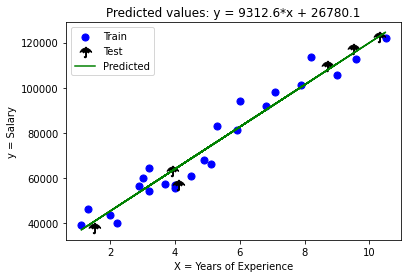

In [ ]:
#Plotting the results from the predictions
plt.scatter(X_train, y_train, color='blue', s=50, label='Train')
plt.scatter(X_test, y_test, color='black', marker=r'$☂$', s=150, label='Test')
plt.plot(X_train, regressor1.predict(X_train), color = 'green', label='Predicted')
plt.title(f'Predicted values: y = {round(regressor1.coef_[0], 1)}*x + {round(regressor1.intercept_, 1)}')
plt.xlabel('X = Years of Experience')
plt.ylabel('y = Salary')
plt.legend()
plt.show()

##Checking the score of the SLR model

In [ ]:
#Checking the score of the predicted values
round(regressor1.score(X_test, y_test), 3)

0.988

##Making Single Predictions

In [ ]:
#Function to make a single prediction
def slr_predict(experience):
  if type(experience)!=int:
    return "Invalid input, use numeric value type"
  elif experience < 0:
    return "Experience must be greater than 0"
  else:
    return f'Predicted salary for {experience} years of experience is: $ {round(regressor1.predict([[experience]])[0], 2)}'

In [ ]:
#Predicting numeric values from input
slr_predict(11)

'Predicted salary for 11 years of experience is: $129218.43'

# 02 Multiple Linear Regression Model

5 Methods for building Multiple Regression Models:

1. Backward Elimination
2. Forward selection.
3. Bidirectional Elimination.
4. Score comparison.
5. All-in. 2^N-1.

## Importing necessary libraries

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Uploading data

In [ ]:
#Uploading dataset from local computer
from google.colab import files
uploaded2 = files.upload()

#Storing dataset in a Pandas Dataframe
import io
df2 = pd.read_csv(io.BytesIO(uploaded2['50_startups.csv']))

Saving 50_startups.csv to 50_startups.csv


In [ ]:
#Checking the dataframe info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
#Checking the categorical values
df2['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [ ]:
#Extracting the samples matrix and target values
X = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values #==> Dependent variable vector

In [ ]:
#Checking the array of samples matrix (features)
X[:5]

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida']], dtype=object)

In [ ]:
#Checking the array of target values
y[:5]

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94])

## Encoding categorical data

In [ ]:
#Applying One Hot Encoding to categorical features
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct2.fit_transform(X))

In [ ]:
#Checking the array of samples matrix (features) after the transformation
X[:5]

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

## Splitting data for training and testing

In [ ]:
#Splitting between train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Multiple Linear Regression (MLR) model

In [ ]:
#Training the multiple linear regression model
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X_train, y_train)

LinearRegression()

## Predicting values using the MLR model



In [ ]:
#Predicting the test sets results
y_pred = regressor2.predict(X_test)
df2_pred = pd.DataFrame(data={'y_test': y_test, 'y_pred': y_pred})
df2_pred = df2_pred.assign(perc = 1-(df2_pred['y_pred']/df2_pred['y_test']))
df2_pred

,y_test,y_pred,perc
0,103282.38,103015.201598,0.002587
1,144259.40,132582.277608,0.080945
2,146121.95,132447.738452,0.093581
3,77798.83,71976.098513,0.074843
4,191050.39,178537.482211,0.065495
5,105008.31,116161.242302,-0.106210
6,81229.06,67851.692097,0.164687
7,97483.56,98791.733747,-0.013419
8,110352.25,113969.435330,-0.032779
9,166187.94,167921.065696,-0.010429


## Visualizing the predicted values

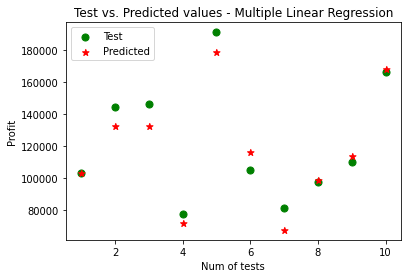

In [ ]:
#Plotting the results from the predictions
plt.scatter(range(1,11), y_test, color='green', s=50, label='Test')
plt.scatter(range(1,11), y_pred, color='red', s=50, marker=r'$\bigstar$', label='Predicted')
plt.title(f'Test vs. Predicted values - Multiple Linear Regression')
plt.xlabel('Num of tests')
plt.ylabel('Profit')
plt.legend(loc='upper left')
plt.show()

# 03 Polynomial Linear Regression Model

5 Methods for building Multiple Regression Models:

1. Backward Elimination
2. Forward selection.
3. Bidirectional Elimination.
4. Score comparison.
5. All-in. 2^N-1.

## Importing necessary libraries

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Uploading data

In [ ]:
#Uploading dataset from local computer
from google.colab import files
uploaded3 = files.upload()

#Storing dataset in a Pandas Dataframe
import io
df3 = pd.read_csv(io.BytesIO(uploaded3['position_salaries.csv']))

Saving position_salaries.csv to position_salaries.csv


In [ ]:
#Checking the dataframe info
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [ ]:
#Checking the categorical values
df3['Position'].value_counts()

Partner              1
Senior Consultant    1
Country Manager      1
CEO                  1
Region Manager       1
Junior Consultant    1
Business Analyst     1
Manager              1
Senior Partner       1
C-level              1
Name: Position, dtype: int64

In [ ]:
#Extracting the samples matrix and target values
X3 = df3.iloc[:, 1:-1].values
y3 = df3.iloc[:, -1].values #==> Dependent variable vector

In [ ]:
#Checking the array of samples matrix (features)
X3[:5]

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
#Checking the array of target values
y3[:5]

array([ 45000,  50000,  60000,  80000, 110000])

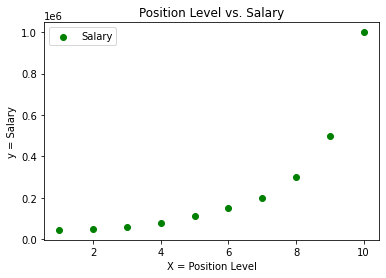

In [ ]:
#Plotting the relationship between Position Level and Salary
plt.scatter(X3, y3, color='green', label='Salary')
plt.title('Position Level vs. Salary')
plt.xlabel('X = Position Level')
plt.ylabel('y = Salary')
plt.legend()
plt.show()

## Building a Polynomail Linear Regression (PLR) model function

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def polynomial_regression(X, y, deg):
  """
  Gets as input an array of X features, array of y target values and number of degrees and
  returns a dataframe with polynomial predictions upto the maximum number of degrees.
  
  """
  poly_dict = {}

  if (type(deg)!=int) | (deg < 1):
    return 'Input must be integer higher than 1'
  else:
    deg_list = list(range(1,deg+1))
    
    for i in deg_list:
      poly_reg = PolynomialFeatures(degree=i)
      X_poly = poly_reg.fit_transform(X)
      lin_reg = LinearRegression()
      lin_reg.fit(X_poly, y)
      poly_dict.update({'deg_'+str(i): list(lin_reg.predict(X_poly))})
      df = pd.DataFrame(data=poly_dict, index=X.flatten().tolist())
    return df

## Training PLR models for different degrees

In [ ]:
#Building a dataframe of models with different degrees of Polynomials
df3 = polynomial_regression(X=X3, y=y3, deg=5)
df3

,deg_1,deg_2,deg_3,deg_4,deg_5
1,-114454.545455,118727.272727,14902.097902,53356.643357,43895.104896
2,-33575.757576,44151.515152,78759.906760,31759.906760,53836.829837
3,47303.030303,8439.393939,94960.372960,58642.191142,57065.268066
4,128181.818182,11590.909091,88223.776224,94632.867133,77286.713287
5,209060.606061,53606.060606,83270.396270,121724.941725,112263.403264
6,289939.393939,134484.848485,104820.512821,143275.058275,152736.596737
7,370818.181818,254227.272727,177594.405594,184003.496504,201349.650350
8,451696.969697,412833.333333,326312.354312,289994.172494,291571.095571
9,532575.757576,610303.030303,575694.638695,528694.638695,506617.715617
10,613454.545455,846636.363636,950461.538462,988916.083916,998377.622376


## Visualizing predictions

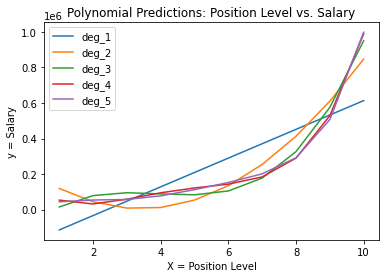

In [ ]:
#Plotting the predictions according to degrees
#plt.scatter(X3, y3, color='green', marker='+', s=100, label='Salary')
df3.plot()
plt.title('Polynomial Predictions: Position Level vs. Salary')
plt.xlabel('X = Position Level')
plt.ylabel('y = Salary')
plt.legend()
plt.show()

# 04 Support Vector Regression (SVR)

In most linear regression models, the objective is to minimize the sum of squared errors, for example Ordinary Least Squares (OLS). But what if we are only concerned about reducing error to a certain degree? In Support Vector Regression (SVR) we have the flexibility to define how much error ϵ (Epsilon) is acceptable in our model, in order to find an appropriate hyperplane to fit the data.

## Importing necessary libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Uploading data

In [2]:
# Uploading dataset from local computer
from google.colab import files
uploaded4 = files.upload()

# Storing dataset in a Pandas Dataframe
import io
df4 = pd.read_csv(io.BytesIO(uploaded4['position_salaries.csv']))

Saving position_salaries.csv to position_salaries (1).csv


In [3]:
# Checking the dataframe info
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
# Extracting the samples matrix and target values
X4 = df4.iloc[:, 1:-1].values
y4 = df4.iloc[:, -1].values #==> Dependent variable vector

In [5]:
# Checking the array of samples matrix (features)
X4[:5]

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [6]:
# Checking the array of target values
y4[:5]

array([ 45000,  50000,  60000,  80000, 110000])

## Initial transformations

In [7]:
# Transform the dependent variable to a 2D array
y4 = y4.reshape(len(y4), 1)
np.shape(y4)

(10, 1)

## Feature Scaling

In [8]:
# If feature scaling is not applied, the SVR will not work.
from sklearn.preprocessing import StandardScaler
sc4_X = StandardScaler() # => 2 StandardScaler object needed to compute the mean and STD independently.
sc4_y = StandardScaler()
X4 = sc4_X.fit_transform(X4)
y4 = sc4_y.fit_transform(y4)

In [9]:
# Checking the X train after scaling (-3 : +3)
X4

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [10]:
# Checking the y train after scaling (-3 : +3)
y4

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model

In [11]:
# Building the SVR model
from sklearn.svm import SVR
regressor_4 =  SVR(kernel='rbf')
regressor_4.fit(X4, np.ravel(y4)) #=> Use ravel to change a 2D array to a flattened array

SVR()

## Predicting values

In [12]:
# Predicting new values
sc4_y.inverse_transform([regressor_4.predict(sc4_X.transform([[6.5]]))])  # => Reversing the scaling before predictions

array([[170370.0204065]])

## Visualizing SVR predictions

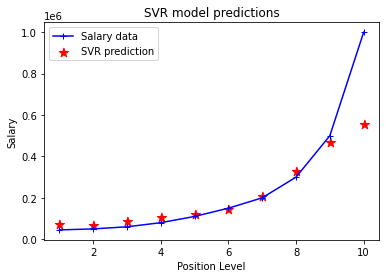

In [39]:
# Visualizing SVR predicted values of salary according to position levels
predictions_4 = regressor_4.predict(X4)
plt.plot(sc4_X.inverse_transform(X4), sc4_y.inverse_transform(y4), color='blue', label='Salary data', marker='+')
plt.scatter(sc4_X.inverse_transform(X4), sc4_y.inverse_transform(predictions_4.reshape(len(predictions_4), 1)), color='red',
            label='SVR prediction', marker=r'$\bigstar$', s=100)
plt.title('SVR model predictions')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()